# Importing Libraries

In [1]:
import os
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, find_peaks

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Importing files

In [3]:
training = "master.csv"
training1 = "lec_tues_4.csv"
training2 = "lab_wed_4.csv"
training3 = "tut_wed_4.csv"
training4 = "lab_fri_4.csv"
training5 = "tut_fri_4.csv"
training6 = "sun_4.csv"

test = "lab_wed_4.csv"
path = "C:\\Users\\ieliz\\Documents\\2021\\FYP\\Stress_Detection_FYP\\python_scripts\\"

In [4]:
os.chdir(path)
print(os.getcwd())
df = pd.read_csv(training)
df1 = pd.read_csv(training1)
df2 = pd.read_csv(training2)
df3 = pd.read_csv(training3)
df4 = pd.read_csv(training4)
df5 = pd.read_csv(training5)
df6 = pd.read_csv(training6)

df = df.append(df1, ignore_index=True)
df = df.append(df2, ignore_index=True)
df = df.append(df3, ignore_index=True)
df = df.append(df4, ignore_index=True)
df = df.append(df5, ignore_index=True)
df = df.append(df6, ignore_index=True)

df_test = pd.read_csv(test)

df["Time (hr:min:sec)"] = pd.to_datetime(df["Time (hr:min:sec)"], format="%H:%M:%S").dt.time
df_test["Time (hr:min:sec)"] = pd.to_datetime(df_test["Time (hr:min:sec)"], format="%H:%M:%S").dt.time

C:\Users\ieliz\Documents\2021\FYP\Stress_Detection_FYP\python_scripts


In [5]:
df

,Time (hr:min:sec),Time (s),GSR,Resistance,Conductance (uS),Heart_Rate,Section,Stressed
0,12:00:01,1,225,51358.88502,19.470828,68,RelaxM4_,2
1,12:00:02,2,224,51111.11111,19.565217,68,RelaxM4_,2
2,12:00:03,3,224,51111.11111,19.565217,69,RelaxM4_,2
3,12:00:04,4,225,51358.88502,19.470828,68,RelaxM4_,2
4,12:00:05,5,224,51111.11111,19.565217,68,RelaxM4_,2
...,...,...,...,...,...,...,...,...
43491,11:26:49,3597,281,68658.00866,14.564943,81,sun_data_1,2
43492,11:26:50,3598,281,68658.00866,14.564943,78,sun_data_1,2
43493,11:26:51,3599,280,68275.86207,14.646465,78,sun_data_1,2
43494,11:26:52,3600,279,67896.99571,14.728192,78,sun_data_1,2


In [6]:
df["Section"].unique()

array(['RelaxM4_', 'LabM4_1_', 'LabM4_2_', 'LabM4_3_', 'lec_tues_0',
       'lab_wed_4_0', 'lab_wed_4_1', 'lab_wed_4_2', 'tut_wed_4_0',
       'tut_wed_4_1', 'lab_fri4_1', 'tut_fri4_1', 'tut_fri4_2',
       'sun_data_1'], dtype=object)

# Calculating Conductance

In [7]:
# df["Conductance (uS)"] = 1*10**6/df["Resistance"]

# Cleaning data (for discontinuities)

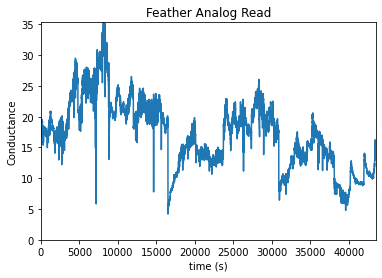

In [8]:
fig, ax = plt.subplots()
ax.set_xlim((0, len(df)))
ax.set_ylim((0, max(df["Conductance (uS)"])))
ax.set_title('Feather Analog Read')
ax.set_xlabel("time (s)")
ax.set_ylabel("Conductance")
ax.plot(df.index, df["Conductance (uS)"])

# Pre-processing Data
## Moving average filter

In [9]:
df_moving_ave = df
df_moving_ave["Conductance (uS)"] = df["Conductance (uS)"].rolling(2).mean() #1 second moving average filter
df_moving_ave = df_moving_ave.dropna()

In [10]:
df_moving_ave_test = df_test
df_moving_ave_test["Conductance (uS)"] = df_test["Conductance (uS)"].rolling(2).mean() #1 second moving average filter
df_moving_ave_test = df_moving_ave_test.dropna()

In [11]:
df_moving_ave

,Time (hr:min:sec),Time (s),GSR,Resistance,Conductance (uS),Heart_Rate,Section,Stressed
1,12:00:02,2,224,51111.11111,19.518023,68,RelaxM4_,2
2,12:00:03,3,224,51111.11111,19.565217,69,RelaxM4_,2
3,12:00:04,4,225,51358.88502,19.518023,68,RelaxM4_,2
4,12:00:05,5,224,51111.11111,19.518023,68,RelaxM4_,2
5,12:00:06,6,224,51111.11111,19.565217,69,RelaxM4_,2
...,...,...,...,...,...,...,...,...
43491,11:26:49,3597,281,68658.00866,14.483729,81,sun_data_1,2
43492,11:26:50,3598,281,68658.00866,14.564943,78,sun_data_1,2
43493,11:26:51,3599,280,68275.86207,14.605704,78,sun_data_1,2
43494,11:26:52,3600,279,67896.99571,14.687328,78,sun_data_1,2


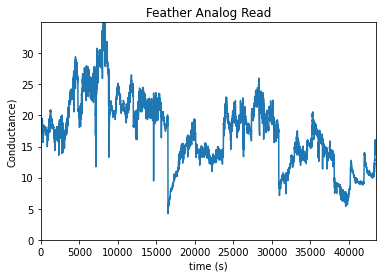

In [12]:
fig, ax = plt.subplots()
ax.set_xlim(0, len(df_moving_ave))
ax.set_ylim(0, max(df_moving_ave['Conductance (uS)']))
ax.set_title('Feather Analog Read')
ax.set_xlabel("time (s)")
ax.set_ylabel("Conductance)")
ax.plot(df_moving_ave.index, df_moving_ave['Conductance (uS)'])

## Min-Max Normalisation

In [13]:
min_val = min(df_moving_ave['Conductance (uS)'])
max_val = max(df_moving_ave['Conductance (uS)'])
scaling = max_val-min_val
df_moving_ave.loc[:, 'Normalised'] = (df_moving_ave.loc[:, 'Conductance (uS)']- min_val)/scaling 

In [14]:
min_val = min(df_moving_ave_test['Conductance (uS)'])
max_val = max(df_moving_ave_test['Conductance (uS)'])
scaling = max_val-min_val
df_moving_ave_test.loc[:, 'Normalised'] = (df_moving_ave_test.loc[:, 'Conductance (uS)']- min_val)/scaling 

In [15]:
df_moving_ave

,Time (hr:min:sec),Time (s),GSR,Resistance,Conductance (uS),Heart_Rate,Section,Stressed,Normalised
1,12:00:02,2,224,51111.11111,19.518023,68,RelaxM4_,2,0.497510
2,12:00:03,3,224,51111.11111,19.565217,69,RelaxM4_,2,0.499043
3,12:00:04,4,225,51358.88502,19.518023,68,RelaxM4_,2,0.497510
4,12:00:05,5,224,51111.11111,19.518023,68,RelaxM4_,2,0.497510
5,12:00:06,6,224,51111.11111,19.565217,69,RelaxM4_,2,0.499043
...,...,...,...,...,...,...,...,...,...
43491,11:26:49,3597,281,68658.00866,14.483729,81,sun_data_1,2,0.333911
43492,11:26:50,3598,281,68658.00866,14.564943,78,sun_data_1,2,0.336550
43493,11:26:51,3599,280,68275.86207,14.605704,78,sun_data_1,2,0.337874
43494,11:26:52,3600,279,67896.99571,14.687328,78,sun_data_1,2,0.340527


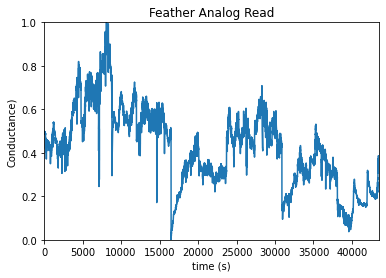

In [16]:
fig, ax = plt.subplots()
ax.set_xlim(0, len(df_moving_ave))
ax.set_ylim(0, max(df_moving_ave['Normalised']))
ax.set_title('Feather Analog Read')
ax.set_xlabel("time (s)")
ax.set_ylabel("Conductance)")
ax.plot(df_moving_ave.index, df_moving_ave['Normalised'])

# Feature Extraction

In [17]:
df_moving_ave["Section_labels"] = df_moving_ave["Section"] + df_moving_ave["Stressed"].astype(str)
unique_sections = df_moving_ave["Section_labels"].unique()
unique_sections_num = df_moving_ave["Section_labels"].nunique()
print(unique_sections)

labels = []
for name in unique_sections:
    curr_label = df_moving_ave.loc[df_moving_ave["Section_labels"] == name, 'Stressed'].unique()[0]
    labels.append(curr_label)
    
#print(labels)

['RelaxM4_2' 'LabM4_1_6' 'LabM4_1_4' 'LabM4_2_7' 'LabM4_3_6' 'LabM4_3_4'
 'lec_tues_04' 'lab_wed_4_04' 'lab_wed_4_05' 'lab_wed_4_14' 'lab_wed_4_15'
 'lab_wed_4_13' 'lab_wed_4_22' 'lab_wed_4_23' 'tut_wed_4_02'
 'tut_wed_4_05' 'tut_wed_4_12' 'tut_wed_4_14' 'lab_fri4_14' 'lab_fri4_17'
 'lab_fri4_13' 'lab_fri4_15' 'tut_fri4_14' 'tut_fri4_13' 'tut_fri4_15'
 'tut_fri4_23' 'tut_fri4_24' 'tut_fri4_25' 'tut_fri4_27' 'sun_data_14'
 'sun_data_15' 'sun_data_13' 'sun_data_16' 'sun_data_12']


In [18]:
df_moving_ave_test["Section_labels"] = df_moving_ave_test["Section"] + df_moving_ave_test["Stressed"].astype(str)
unique_sections_test = df_moving_ave_test["Section_labels"].unique()
unique_sections_num_test = df_moving_ave_test["Section_labels"].nunique()
print(unique_sections_test)

labels_test = []
for name in unique_sections_test:
    curr_label = df_moving_ave_test.loc[df_moving_ave_test["Section_labels"] == name, 'Stressed'].unique()[0]
    labels_test.append(curr_label)
    
print(labels_test)

['lab_wed_4_04' 'lab_wed_4_05' 'lab_wed_4_14' 'lab_wed_4_15'
 'lab_wed_4_13' 'lab_wed_4_22' 'lab_wed_4_23']
[4, 5, 4, 5, 3, 2, 3]


## Extract Phasic components

## Applying low pass filter

In [19]:
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

## Identifying onset and offset of stressor
## Find peaks and maximum amplitude
## Find average GSR

In [20]:
# For each section of data from assessment centre
# Label as stressed/not stressed
# Find peak, maximum amplitude and average GSR
# Training data: peak, max and average GSR + label

In [21]:
# Storing values
peaks = []
max_peaks = []
num_peaks = []
average_GSRs = []
peaks_test = []
max_peaks_test = []
num_peaks_test = []
average_GSRs_test = []

# Filter requirements
order = 6
fs = 60      # sample rate, Hz
cutoff = 20  # desired cutoff frequency of the filter, Hz

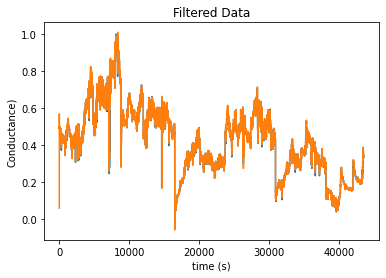

In [23]:
# Low pass filter
y = butter_lowpass_filter(df_moving_ave["Normalised"], cutoff, fs, order)
df_moving_ave["LPF"] = y

y_test = butter_lowpass_filter(df_moving_ave_test["Normalised"], cutoff, fs, order)
df_moving_ave_test["LPF"] = y_test

fig, ax = plt.subplots()
ax.set_title('Filtered Data')
ax.set_xlabel("time (s)")
ax.set_ylabel("Conductance)")
ax.plot(df_moving_ave.index,df_moving_ave["Normalised"])
ax.plot(df_moving_ave.index,y)

0 0.5683747467203849 0.453582097001513 2
1 0.8243978062620345 0.5406697015384888 6
2 0.5899940148921455 0.47100384385561117 4
3 1.0100167607893484 0.7160357336091376 7
4 0.909373215450163 0.621815556763823 6
5 0.696318189771793 0.5672613715546504 4
6 0.663069753690702 0.5448033838750763 4
7 0.36487360742700703 0.20975740045367489 4
8 0.20626988458017176 0.15125809115072616 5
9 0.49383809633353837 0.36996795632008145 4
10 0.36360310520479006 0.3543774074050089 5
11 0.3694863728765414 0.31339846494013546 3
12 0.6097370808735978 0.4854708424228634 2
13 0.6147166189420958 0.525350599000991 3
14 0.713734467318183 0.5509724614264552 2
15 0.6346069799176256 0.5849674073833186 5
16 0.5874951231565233 0.4701324394866199 2
17 0.5899339470479006 0.5626973213381501 4
18 0.4330005724160825 0.2781229665224221 4
19 0.2121160022297986 0.18555198451536364 7
20 0.17128750714420493 0.16133986246437954 3
21 0.2517032035372259 0.2413354683907555 5
22 0.5340144306213285 0.38696443221883176 4
23 0.4655513667

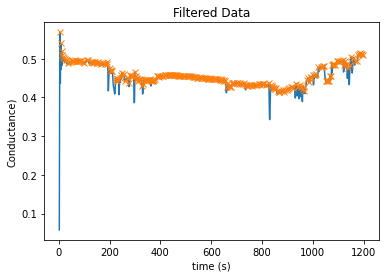

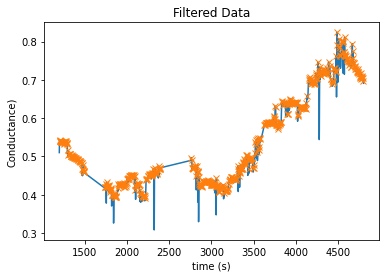

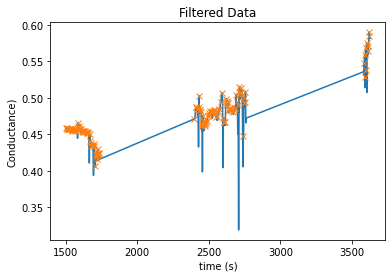

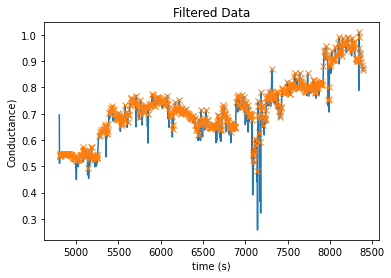

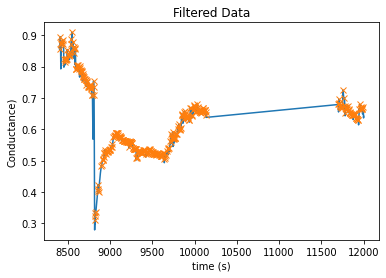

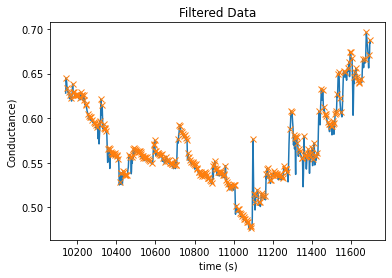

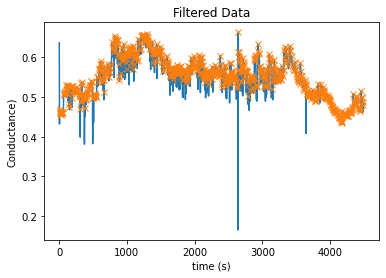

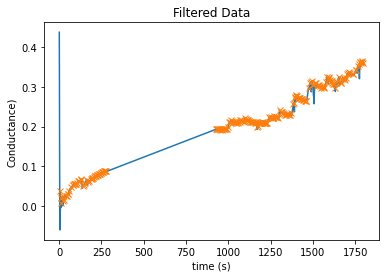

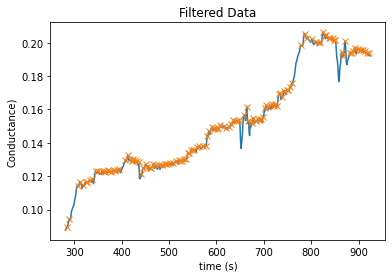

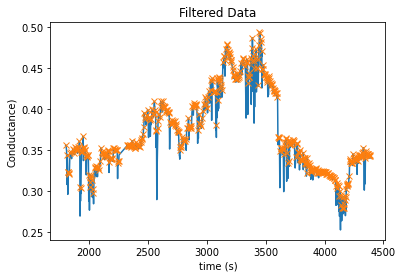

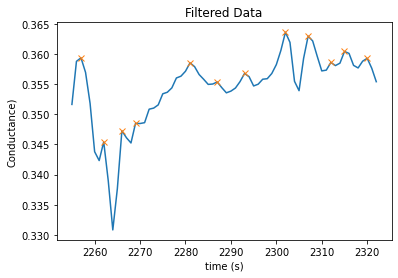

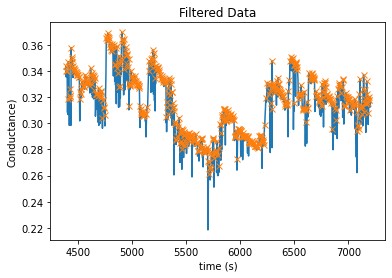

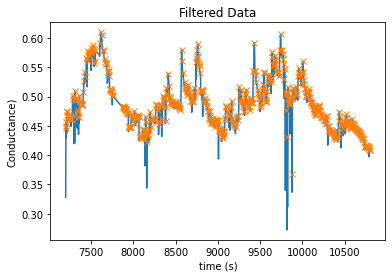

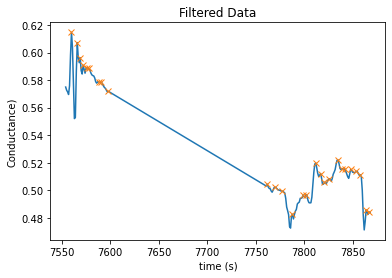

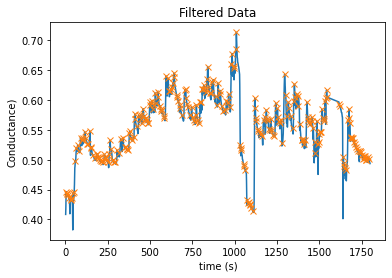

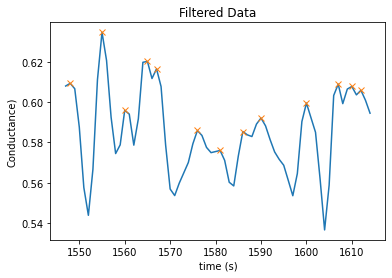

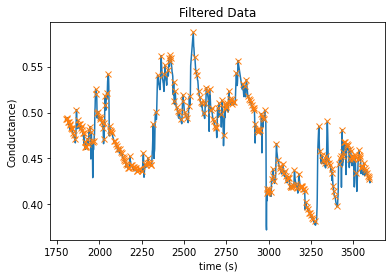

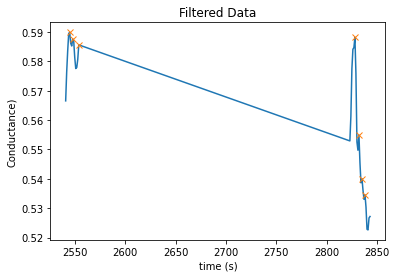

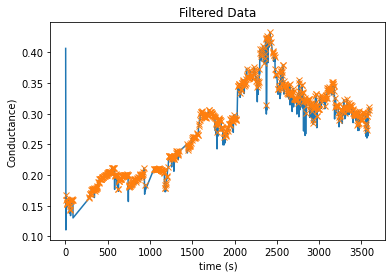

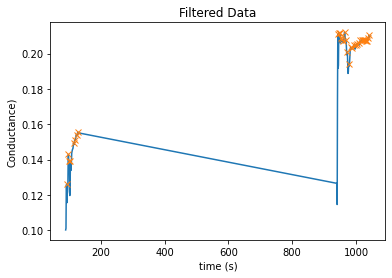

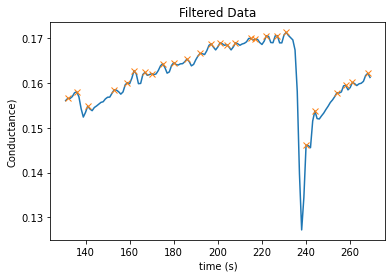

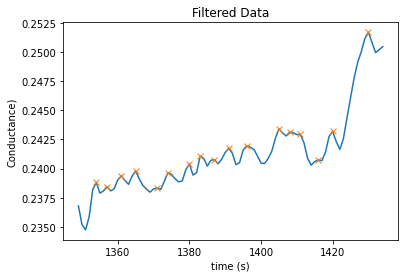

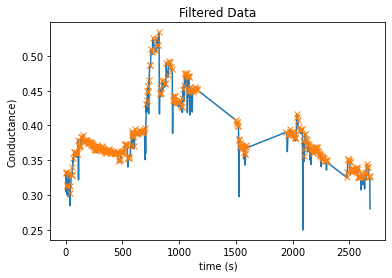

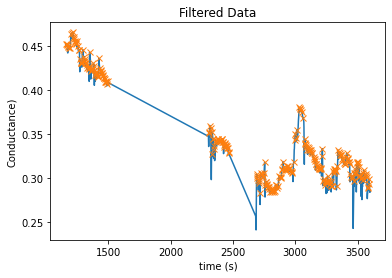

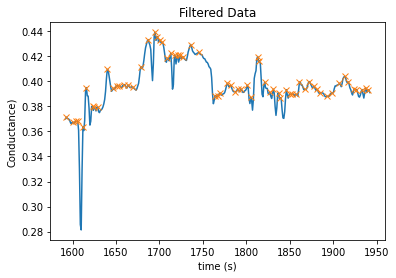

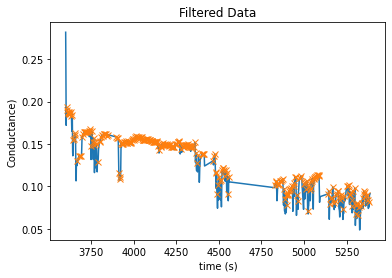

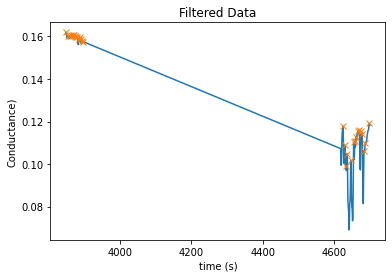

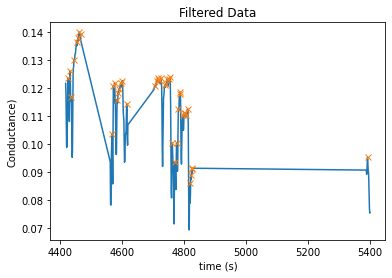

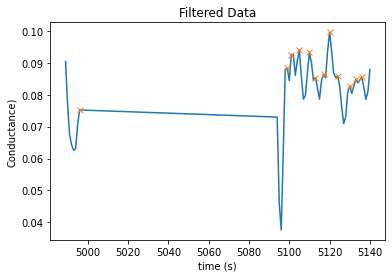

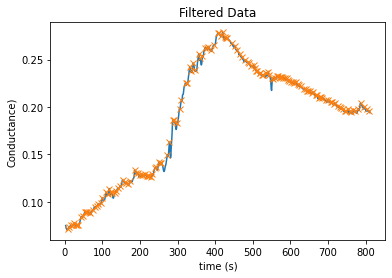

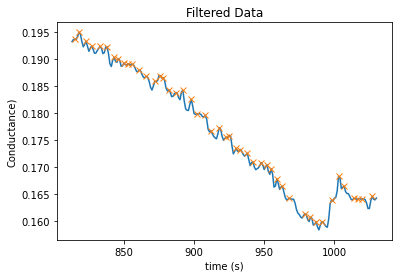

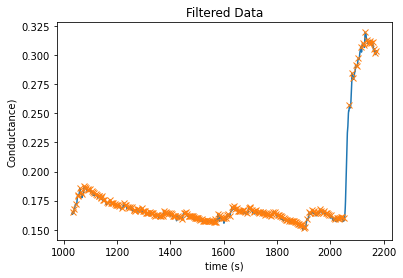

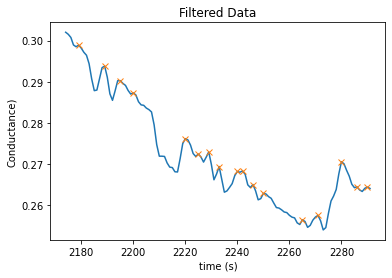

In [24]:
for i in range(unique_sections_num-1):
    grouped = df_moving_ave.groupby(df_moving_ave["Section_labels"])
    section = grouped.get_group(unique_sections[i])
    time = section['Time (s)'].to_numpy()
    data = section["LPF"].to_numpy()
    #print('time', time, data)
    
    fig, ax = plt.subplots()
    ax.set_title('Filtered Data')
    ax.set_xlabel("time (s)")
    ax.set_ylabel("Conductance)")
    ax.plot(time, data)
    
    curr_peaks_ind, _ = find_peaks(data)
    curr_peaks = data[curr_peaks_ind]
    max_peak = max(curr_peaks)

    ax.plot(time[curr_peaks_ind],curr_peaks, "x")
    
    peaks.append(curr_peaks)
    num_peaks.append(len(curr_peaks))
    max_peaks.append(max_peak)
    
    ave = np.mean(data)
    average_GSRs.append(ave)
    
    print(i, max_peak, ave, labels[i])

In [25]:
for i in range(unique_sections_num_test):
    grouped = df_moving_ave_test.groupby(df_moving_ave_test["Section_labels"])
    section = grouped.get_group(unique_sections_test[i])
    time = section['Time (s)'].to_numpy()
    data = section["LPF"].to_numpy()
    #print('time', time, data)
    
    curr_peaks_ind, _ = find_peaks(data)
    curr_peaks = data[curr_peaks_ind]
    max_peak = max(curr_peaks)
    
    peaks_test.append(curr_peaks)
    num_peaks_test.append(len(curr_peaks))
    max_peaks_test.append(max_peak)
    
    ave = np.mean(data)
    average_GSRs_test.append(ave)
    
    print(i, max_peak, ave, labels_test[i])

0 0.5995945307606599 0.34392035304148894 4
1 0.3389620190044722 0.24856148085584878 5
2 0.8115210736421414 0.6079660426264075 4
3 0.5975067223572692 0.5823461905166492 5
4 0.6071746595475176 0.5150057491195299 3
5 1.0019771544230291 0.7977712173077626 2
6 1.010159998374501 0.8633053733705445 3


In [26]:
print("max_peaks", max_peaks)
print("average_GSRs", average_GSRs)
print("labels", labels)

print("max_peaks", max_peaks_test)
print("average_GSRs", average_GSRs_test)
print("labels", labels_test)

max_peaks [0.5683747467203849, 0.8243978062620345, 0.5899940148921455, 1.0100167607893484, 0.909373215450163, 0.696318189771793, 0.663069753690702, 0.36487360742700703, 0.20626988458017176, 0.49383809633353837, 0.36360310520479006, 0.3694863728765414, 0.6097370808735978, 0.6147166189420958, 0.713734467318183, 0.6346069799176256, 0.5874951231565233, 0.5899339470479006, 0.4330005724160825, 0.2121160022297986, 0.17128750714420493, 0.2517032035372259, 0.5340144306213285, 0.4655513667785719, 0.43930656638452487, 0.19378246190960585, 0.1619466016713009, 0.1398901430098116, 0.0995704879173788, 0.27876014225335044, 0.19492978159331026, 0.31982957644252474, 0.29890583175181773]
average_GSRs [0.453582097001513, 0.5406697015384888, 0.47100384385561117, 0.7160357336091376, 0.621815556763823, 0.5672613715546504, 0.5448033838750763, 0.20975740045367489, 0.15125809115072616, 0.36996795632008145, 0.3543774074050089, 0.31339846494013546, 0.4854708424228634, 0.525350599000991, 0.5509724614264552, 0.5849

In [27]:
stress_df = pd.DataFrame()
stress_df['Max'] = pd.Series(max_peaks)
stress_df['AveGSR'] = pd.Series(average_GSRs)
stress_df['Stress'] = pd.Series(labels)
stress_df

,Max,AveGSR,Stress
0,0.568375,0.453582,2
1,0.824398,0.540670,6
2,0.589994,0.471004,4
3,1.010017,0.716036,7
4,0.909373,0.621816,6
5,0.696318,0.567261,4
6,0.663070,0.544803,4
7,0.364874,0.209757,4
8,0.206270,0.151258,5
9,0.493838,0.369968,4


In [28]:
stress_df_test = pd.DataFrame()
stress_df_test['Max'] = pd.Series(max_peaks_test)
stress_df_test['AveGSR'] = pd.Series(average_GSRs_test)
stress_df_test['Stress'] = pd.Series(labels_test)
stress_df_test

,Max,AveGSR,Stress
0,0.599595,0.343920,4
1,0.338962,0.248561,5
2,0.811521,0.607966,4
3,0.597507,0.582346,5
4,0.607175,0.515006,3
5,1.001977,0.797771,2
6,1.010160,0.863305,3


# K-Nearest Neighbours

In [29]:
from sklearn import neighbors
import seaborn as sns
from matplotlib.colors import ListedColormap
import pickle

In [30]:
n_neighbours = 3
X = stress_df.loc[:, ['Max', 'AveGSR']]
y = stress_df.loc[:, 'Stress']

In [31]:
# Colour maps
cmap_light = ListedColormap(['cyan', 'cornflowerblue'])
cmap_dark = ['c', 'darkblue']

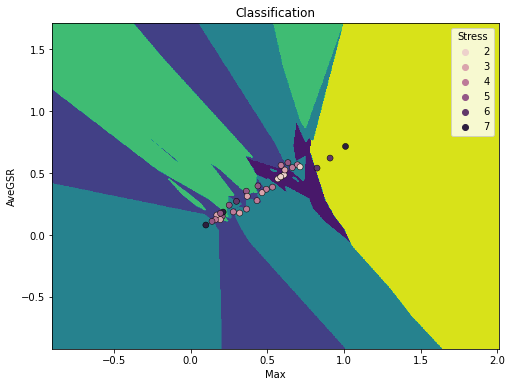

In [32]:
weight = 'uniform'#'distance'
h = 0.005 # step size in mesh
clf = neighbors.KNeighborsClassifier(n_neighbours, weight)
clf.fit(X, y)

x_min, x_max = X.iloc[:, 0].min()-1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min()-1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put result into a colour plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z) #cmap=cmap_light

# Plot also the training points
# sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y,
#                 palette=cmap_dark, alpha=1.0, edgecolor="black")
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y, alpha=1.0, edgecolor="black")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Classification")
plt.show()

In [33]:
# save the trained model
saved_model_name = "knn_model_all_data.sav"
saved_model = pickle.dump(clf, open(saved_model_name, "wb"))

In [34]:
for i in range(len(stress_df_test)):
    predicted_label = clf.predict([stress_df_test.iloc[i, 0:2]])[0]
    print(i)
    actual_label = stress_df_test.iloc[i, 2]

    if predicted_label >= 5:
        print("Predicted: Stressed", predicted_label)
    else:
        print("Predicted: Not Stressed", predicted_label)

    if actual_label >= 5:
        print("Actual: Stressed", actual_label)
    else:
        print("Actual: Not Stressed", actual_label)   


0
Predicted: Not Stressed 4
Actual: Not Stressed 4
1
Predicted: Not Stressed 3
Actual: Stressed 5
2
Predicted: Stressed 6
Actual: Not Stressed 4
3
Predicted: Not Stressed 3
Actual: Stressed 5
4
Predicted: Not Stressed 2
Actual: Not Stressed 3
5
Predicted: Stressed 6
Actual: Not Stressed 2
6
Predicted: Stressed 6
Actual: Not Stressed 3


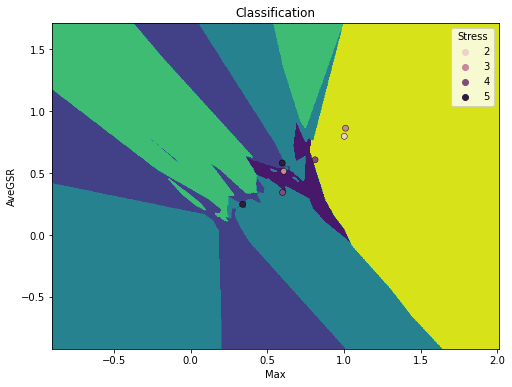

In [35]:
X = stress_df_test.loc[:, ['Max', 'AveGSR']]
y = stress_df_test.loc[:, 'Stress']
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z) #cmap=cmap_light

# Plot also the training points
# sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y,
#                 palette=cmap_dark, alpha=1.0, edgecolor="black")
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y, alpha=1.0, edgecolor="black")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Classification")
plt.show()